/Users/Parivash/opt/anaconda3/envs/tf/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


Frame: 0, R_ee: 67.9223403930664
Frame: 1, R_ee: 47.622108459472656
Frame: 2, R_ee: 51.263484954833984
Frame: 3, R_ee: 26.98684310913086
Frame: 4, R_ee: 44.63779830932617
Frame: 5, R_ee: 44.38656234741211
Frame: 6, R_ee: 35.73689651489258
Frame: 7, R_ee: 34.20719909667969
Frame: 8, R_ee: 36.40652084350586
Frame: 9, R_ee: 48.905696868896484
Frame: 10, R_ee: 30.6012020111084
Frame: 11, R_ee: 42.1629524230957
Frame: 12, R_ee: 37.29059600830078
Frame: 13, R_ee: 49.63451385498047
Frame: 14, R_ee: 46.044281005859375
Frame: 15, R_ee: 16.50884437561035
Frame: 16, R_ee: 38.79365158081055
Frame: 17, R_ee: 37.96773910522461
Frame: 18, R_ee: 34.93614959716797
Frame: 19, R_ee: 31.084396362304688
Frame: 20, R_ee: 11.606070518493652
Frame: 21, R_ee: 20.89147186279297
Frame: 22, R_ee: 52.84397506713867
Frame: 23, R_ee: 64.0170669555664
Frame: 24, R_ee: 46.62603759765625
Frame: 25, R_ee: 39.86042022705078
Frame: 26, R_ee: 43.045166015625
Frame: 27, R_ee: 31.545520782470703
Frame: 28, R_ee: 25.013114929

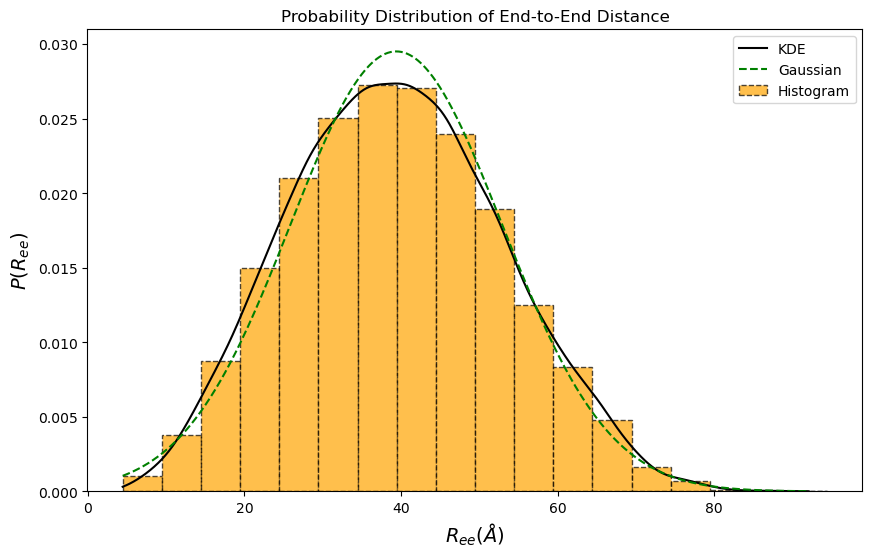

In [9]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm

input_pdb = '/Users/Parivash/Documents/IDP_Project/Run_2/input.pdb' # provide the path of the input file in your system
input_dcd = '/Users/Parivash/Documents/IDP_Project/Run_2/md2.dcd'  # provide the path of md2 file in your system

u = mda.Universe(input_pdb, input_dcd)

ree_values = []

start_index = 0 
end_index = -1 
for ts in u.trajectory:
    start_atom = u.select_atoms('resid 2').atoms[0]  
    end_atom = u.select_atoms('resid 40').atoms[-1]  

    R_ee = np.linalg.norm(end_atom.position - start_atom.position)
    ree_values.append(R_ee)
    print(f"Frame: {ts.frame}, R_ee: {R_ee}")
    
ree_array = np.array(ree_values)

kde = gaussian_kde(ree_array)
x_range = np.linspace(min(ree_array), max(ree_array), 1000)
kde_values = kde(x_range)

mean = ree_array.mean()
std = ree_array.std()
gaussian_dist = norm.pdf(x_range, loc=mean, scale=std)

bin_size = 5 
bins = np.arange(min(ree_array), max(ree_array) + bin_size, bin_size)
hist_values, bin_edges = np.histogram(ree_array, bins=bins, density=True)
bin_midpoints = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# plotting
plt.figure(figsize=(10, 6))
plt.bar(bin_midpoints, hist_values, align='center', width=bin_edges[1] - bin_edges[0], alpha=0.7, color='orange', edgecolor='black',linestyle='--',  label='Histogram')
plt.plot(x_range, kde_values, label='KDE', color='black')
plt.plot(x_range, gaussian_dist, label='Gaussian', linestyle='--', color='green')
plt.xlabel(r'$R_{ee} (\AA)$', fontsize=14)
plt.ylabel(r'$P(R_{ee})$', fontsize=14)
plt.title('Probability Distribution of End-to-End Distance')
plt.legend()
plt.show()


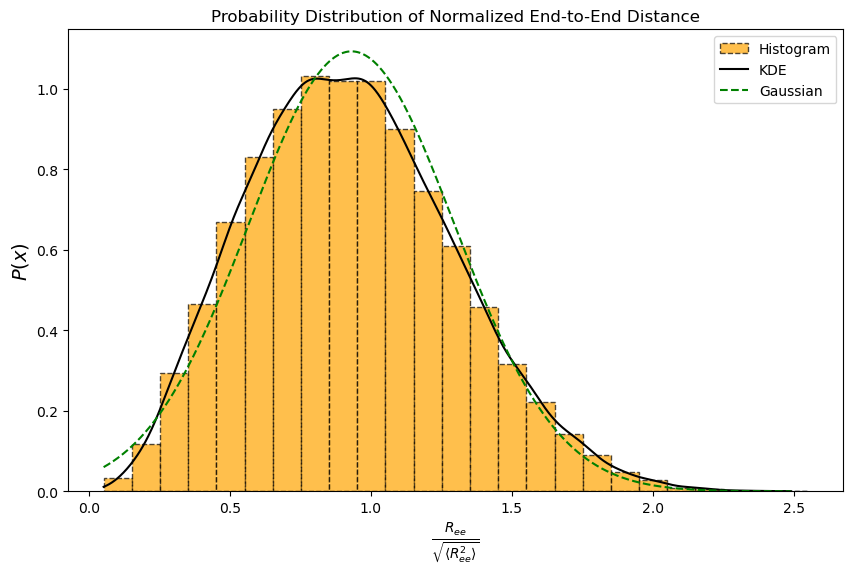

In [10]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm
ree_values = []

start_index = 0  
end_index = -1   

for ts in u.trajectory:
    R_ee = np.linalg.norm(u.atoms.positions[end_index] - u.atoms.positions[start_index])
    ree_values.append(R_ee)

ree_array = np.array(ree_values)

mean_square_ree = np.mean(ree_array**2)

normalized_ree = ree_array / np.sqrt(mean_square_ree)

bin_size = 0.1 
bins = np.arange(min(normalized_ree), max(normalized_ree) + bin_size, bin_size)
hist_values, bin_edges = np.histogram(normalized_ree, bins=bins, density=True)

bin_midpoints = 0.5 * (bin_edges[1:] + bin_edges[:-1])

kde = gaussian_kde(normalized_ree)
x_range = np.linspace(min(normalized_ree), max(normalized_ree), 1000)
kde_values = kde(x_range)
mean = normalized_ree.mean()
std = normalized_ree.std()
gaussian_dist = norm.pdf(x_range, loc=mean, scale=std)

plt.figure(figsize=(10, 6))

plt.hist(normalized_ree, bins=bins, alpha=0.7, color='orange', edgecolor='black', density=True, label='Histogram', linestyle='dashed')

plt.plot(x_range, kde_values, label='KDE', color='black')

plt.plot(x_range, gaussian_dist, label='Gaussian', linestyle='--', color='green')

plt.xlabel(r'$\frac{R_{ee}}{\sqrt{\langle R_{ee}^2 \rangle}}$', fontsize=14)
plt.ylabel(r'$P(x)$', fontsize=14)
plt.title('Probability Distribution of Normalized End-to-End Distance')
plt.legend()
plt.show()


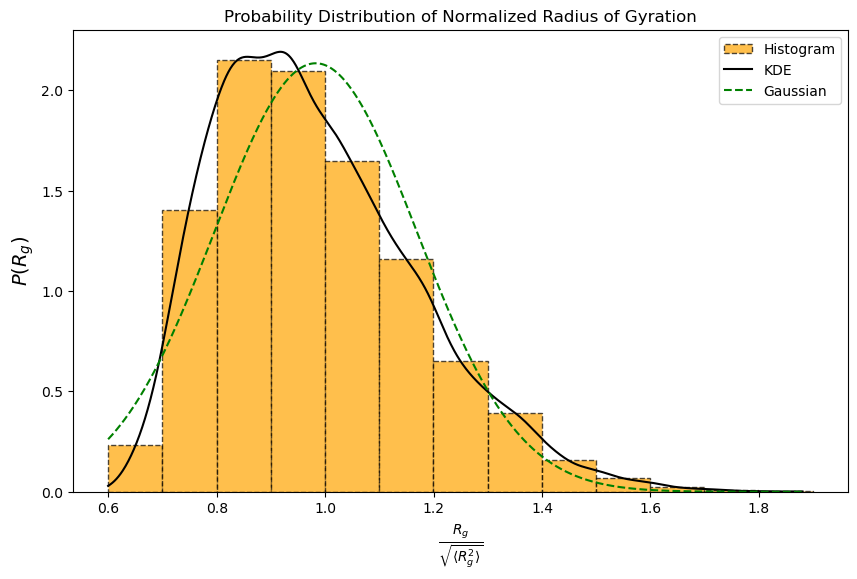

In [11]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm

u = mda.Universe(input_pdb, input_dcd)
rg_values = []

for ts in u.trajectory:
    R_g = u.atoms.radius_of_gyration()
    rg_values.append(R_g)

rg_array = np.array(rg_values)
mean_square_rg = np.mean(rg_array**2)
normalized_rg = rg_array / np.sqrt(mean_square_rg)
bin_size = 0.1 
bins = np.arange(min(normalized_rg), max(normalized_rg) + bin_size, bin_size)
hist_values, bin_edges = np.histogram(normalized_rg, bins=bins, density=True)
bin_midpoints = 0.5 * (bin_edges[1:] + bin_edges[:-1])
kde = gaussian_kde(normalized_rg)
x_range = np.linspace(min(normalized_rg), max(normalized_rg), 1000)
kde_values = kde(x_range)
mean = normalized_rg.mean()
std = normalized_rg.std()
gaussian_dist = norm.pdf(x_range, loc=mean, scale=std)
plt.figure(figsize=(10, 6))
plt.hist(normalized_rg, bins=bins, alpha=0.7, color='orange', edgecolor='black', density=True, label='Histogram', linestyle='dashed')
plt.plot(x_range, kde_values, label='KDE', color='black')
plt.plot(x_range, gaussian_dist, label='Gaussian', linestyle='--', color='green')
plt.xlabel(r'$\frac{R_g}{\sqrt{\langle R_g^2 \rangle}}$', fontsize=14)
plt.ylabel(r'$P(R_g)$', fontsize=14)
plt.title('Probability Distribution of Normalized Radius of Gyration')
plt.legend()
plt.show()


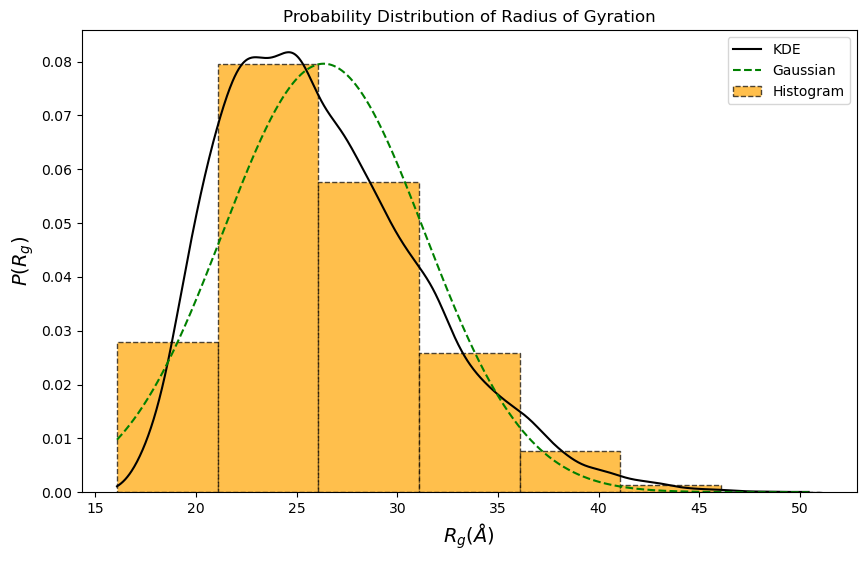

In [12]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm
u = mda.Universe(input_pdb, input_dcd)
rg_values = []

for ts in u.trajectory:
    R_g = u.atoms.radius_of_gyration()
    rg_values.append(R_g)
rg_array = np.array(rg_values)
kde = gaussian_kde(rg_array)
x_range = np.linspace(min(rg_array), max(rg_array), 1000)
kde_values = kde(x_range)

mean = rg_array.mean()
std = rg_array.std()
gaussian_dist = norm.pdf(x_range, loc=mean, scale=std)
bin_size = 5 
bins = np.arange(min(rg_array), max(rg_array) + bin_size, bin_size)
hist_values, bin_edges = np.histogram(rg_array, bins=bins, density=True)
bin_midpoints = 0.5 * (bin_edges[1:] + bin_edges[:-1])
plt.figure(figsize=(10, 6))
plt.bar(bin_midpoints, hist_values, align='center', width=bin_edges[1] - bin_edges[0], alpha=0.7, color='orange', edgecolor='black', linestyle='--', label='Histogram')
plt.plot(x_range, kde_values, label='KDE', color='black')
plt.plot(x_range, gaussian_dist, label='Gaussian', linestyle='--', color='green')
plt.xlabel(r'$R_g (\AA)$', fontsize=14)
plt.ylabel(r'$P(R_g)$', fontsize=14)
plt.title('Probability Distribution of Radius of Gyration')
plt.legend()
plt.show()


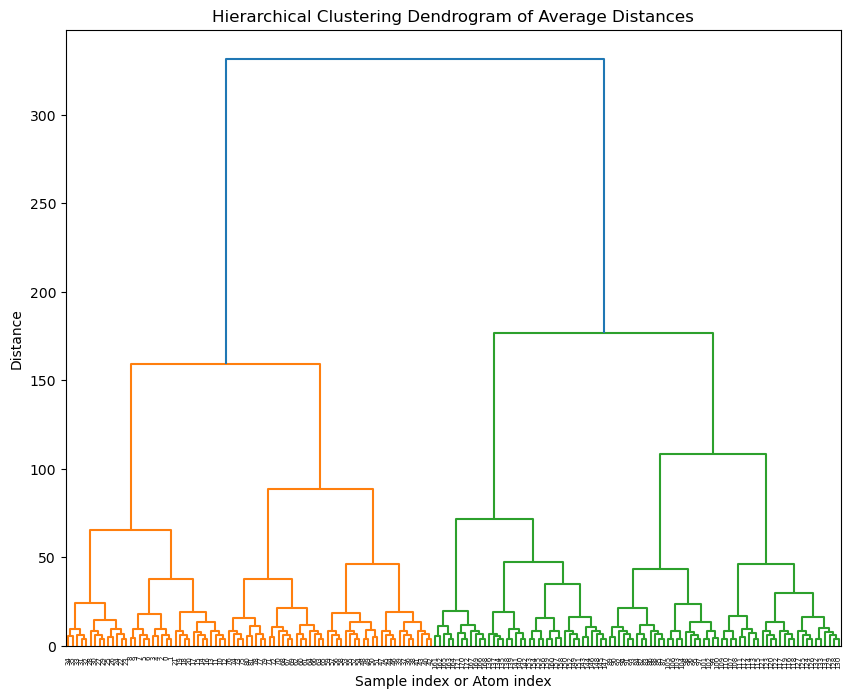

In [5]:
import MDAnalysis as mda
from MDAnalysis.analysis import distances
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
# provide the path of the file in your system
u = mda.Universe('/Users/Parivash/Documents/IDP_Project/Run_2/input.pdb', '/Users/Parivash/Documents/IDP_Project/Run_2/md2.dcd')
protein = u.select_atoms('protein')
dist_matrix_list = []
for ts in u.trajectory:
    dist_matrix = distances.distance_array(protein.positions, protein.positions)
    dist_matrix_list.append(dist_matrix)
dist_matrices = np.array(dist_matrix_list)
average_dist_matrix = np.mean(dist_matrices, axis=0)
condensed_dist_matrix = squareform(average_dist_matrix)
Z = linkage(condensed_dist_matrix, method='ward')
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram of Average Distances')
plt.xlabel('Sample index or Atom index')
plt.ylabel('Distance')
plt.show()
